<a href="https://colab.research.google.com/github/edugaitann81/Mercado_libre_prueba/blob/main/Tarea_1_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 1: Métodos de aprendizaje conjunto.

## 1. Preguntas conceptuales

### 1.1. ¿Si un algoritmo `gradient boosting ensemble` muestra `sobreajuste`, ¿debería aumentar o disminuir la tasa de aprendizaje? Argumente su respuesta.

**Respuesta:**
##### Si hay sobreajuste en un modelo, para este caso gradient Boosting, significa que el modelo funciona muy bien con los datos de entrenamiento pero mal con los datos nuevos o test, por lo tanto al estar sobreajustado, probablemente la tasa de aprendizaje sea alta, ya que el modelo aprende muy rapido, cada nuevo arbol que se añade al modelo tiene un gran impacto, ajustandose muy bien a los datos de entrenamiento, capturando el ruido, pero no generaliza bien con los datos nuevos.
##### Lo que deberia buscarse para mitigar el sobreajuste es una tasa de aprendizaje mas baja, esto puede lograrse aunmentando el numero de estimadores o arboles, buscando un modelo mas robusto, que no se ajuste de una forma tan precisa a las particularidades de los datos de entrenamiento.

### 1.2. Si ha entrenado 5 `modelos diferentes` de clasificación con exactamente los mismos datos de entrenamiento y todos ellos alcanzan una exactitud (`accuracy`) del $95\%$, ¿existe alguna posibilidad de que pueda combinar estos modelos para obtener mejores resultados? Si es así, ¿cómo? Si no, ¿por qué?

**Respuesta:**
######SI, existe la posibilidad de combinar estos modelos, para mejorar los resultados, como se vio en las primeras clases existen metedologías como:
######1. Metodo por Votación: Modelos de diferentes tipos, consiste en tomar una decisón a traves de Votos, tiene 2 clases
 ###### Dura: Cada modelo hace una predicción, y la clase que recibe más votos es la decisón Final (Regla de la Mayoria).
######  Suave: Se calcula el valor promedio de cada probabilidad y se determina la probabilidad más alta, como resultado final      
######2. Bagging: Entrena múltiples versiones del mismo modelo en diferentes subconjuntos del conjunto de datos de entrenamiento y luego combina sus predicciones, por ejemplo Random Forest, aquí se generan varios arboles de decisón y se combinan sus prediccones.  
######3. Boosting: Consiste en entrenar los modelos de manera secuencial, donde cada modelo intenta corregir los errores de los modelos anteriores. en clase se vio el adaBoost como ejemplo pero tambien uno de los ejemplos más comunes, es el Gradient Boosting, y otros como XGBoost y LGBM.

######Ventajas: Reducción de Varianza, Robustez, Mejora la generalización.

### 1.3. Suponga que en el escenario de la pregunta `1.2` se combinan los `5` clasificadores base mediante el método de `voto mayoriatario duro`. Calcule el error del clasificador conjunto.

**Respuesta:**

In [ ]:
from math import comb

# Parámetros
n = 5
p = 0.05
q = 1 - p

# Calculo el error de clasificador conjunto (votación dura)
P_error_conjunto = 0

# Suma de las probabilidades de 3 a 5 errores
for k in range(3, n+1):
    P_error_conjunto += comb(n, k) * (p**k) * (q**(n-k))

P_error_conjunto

0.0011581250000000003

### 1.4. ¿Si un algoritmo `Adaboost` muestra `subajuste`, ¿qué hiperparámetros debería ajustar y cómo? Argumente su respuesta.

#### Respuesta

## 2. Ejercicio(s) práctico(s)

El conjunto de datos `mnist_784`, contiene 70.000 pequeñas imágenes de dígitos escritos a mano por estudiantes de secundaria y empleados de la Oficina del Censo de EE.UU. Es posible acceder a este dataset medinte las siguientes instrucciones:

In [2]:
%%time
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

pd.DataFrame(X)


CPU times: user 22.6 s, sys: 431 ms, total: 23 s
Wall time: 28.9 s


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X.max()

255.0

La etiqueta de esta imagen es:  3


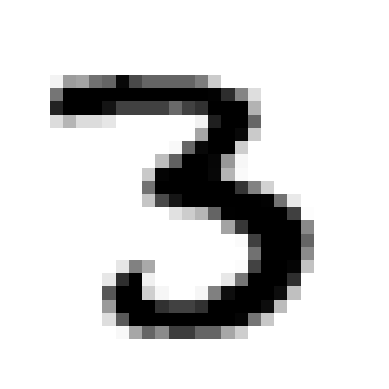

In [3]:
##Visualización
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

print("La etiqueta de esta imagen es: ", y[12])
plot_digit(X[12])

- 2.1 Escale todas las `784` variables con el método `min-max`; pero usando en máximo y el mínimo globales, en lugar de los de cada columna. Vrase el `ejercicio 0312` del capítulo 5, unidad 8 (`ensemble algorithms`).

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Calculo del máximo y mínimo globales
global_max = np.max(X)
global_min = np.min(X)

# Escalar con MinMaxScaler los valores globales
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler_global = scaler.fit_transform(X - global_min) / (global_max - global_min)

print("Mínimo:", np.min(X_scaler_global))
print("Máximo:", np.max(X_scaler_global))

Mínimo: 0.0
Máximo: 0.00392156862745098


In [5]:
# Tabla de datos escalada
X_scaler_global

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
# Dimensiones
X_scaler_global.shape

(70000, 784)

- 2.2 Divida los datos en un conjunto de entrenamiento y un conjunto de prueba (utilizar $60.000$ registros para el entrenamiento y $10.000$ para prueba). Luego, entrene los siguientes clasificadores optimizando los `hiperparámetros` más representativos (excepto los de regularización) mediante la `validación cruzada `:

  - clasificador SVM.
  - Regresión logística
  - Naive Bayes
  - K-vecinos
  - Árbol de decisión

  Compare los rendimientos de cada uno de ellos.

In [5]:
# Divido los datos en Train y Test
from sklearn.model_selection import train_test_split

# datos en Train y test
X_train, X_test, y_train, y_test = train_test_split(X_scaler_global, y, test_size=10000, train_size=60000, random_state=42)

print(X_train.shape[0])
print(X_test.shape[0])

60000
10000


Me fue necesario reducir a un 10% el conjunto de train, ya que con los 60k dura más de 3.45 hrs y no ejecuta, incluso modelo por modelo, por eso trabajo con el 10%

In [6]:
# Reducir el tamaño del conjunto de datos de entrenamiento
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=42)

print(X_train_sample.shape[0])
print(y_train_sample.shape[0])

6000
6000


Por tiempo ejecuto clasificador por clasificador ya que el proceso al tiempo tardo 3 horas y no termino,
###### Nota: Utilizo RandomizedSearchCV, como opción mas rapida explora una cantidad fija de combinaciones, por cuestión de maquina y tiempo

In [20]:
########################
# SVM
########################
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV # opción mas rapida explora una cantidad fija de combinaciones
from sklearn.metrics import accuracy_score
import joblib

# Parámetros SVM
svm_params = {
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Optimización y validación cruzada para SVM
svm = SVC(probability=True)  # Habilita cálculo de probabilidades
random_search_svm = RandomizedSearchCV(svm, svm_params, cv=3, scoring='accuracy', n_iter=5, n_jobs=-1, random_state=42)
random_search_svm.fit(X_train_sample, y_train_sample)

best_svm = random_search_svm.best_estimator_
joblib.dump(best_svm, 'SVM_model.pkl')  # Guardar el mejor SVM

print(f"Mejor configuración para SVM:")
print(random_search_svm.best_params_)
print(f"Precisión media de validación cruzada: {random_search_svm.best_score_:.4f}")
joblib.dump(random_search_svm.best_params_, 'svm_best_params.pkl')

# Evaluación en el conjunto de prueba
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
joblib.dump(y_pred_svm, 'SVM_pred.pkl')
joblib.dump(accuracy_svm, 'SVM_accuracy.pkl')

print(f"SVM: Precisión en el conjunto de prueba = {accuracy_svm:.4f}")

Mejor configuración para SVM:
{'kernel': 'rbf', 'gamma': 'scale'}
Precisión media de validación cruzada: 0.9493
SVM: Precisión en el conjunto de prueba = 0.9504


In [21]:
#################################
# Regresión Logistica
#################################

from sklearn.linear_model import LogisticRegression

# Parámetros para Regresión Logística
logreg_params = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Optimización y validación cruzada para Regresión Logística
logreg = LogisticRegression()
random_search_logreg = RandomizedSearchCV(logreg, logreg_params, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
random_search_logreg.fit(X_train_sample, y_train_sample)

best_logreg = random_search_logreg.best_estimator_
joblib.dump(best_logreg, 'LogisticRegression_model.pkl') # Voy guardando la mejor RL

print(f"Mejor configuración para Regresión Logística:")
print(random_search_logreg.best_params_)
print(f"Precisión media de validación cruzada: {random_search_logreg.best_score_:.4f}")
joblib.dump(random_search_logreg.best_params_, 'logreg_best_params.pkl')

# Evaluación en el conjunto de prueba
y_pred_logreg = best_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
joblib.dump(y_pred_logreg, 'LogisticRegression_pred.pkl')
joblib.dump(accuracy_logreg, 'LogisticRegression_accuracy.pkl')

print(f"Regresión Logística: Precisión en el conjunto de prueba = {accuracy_logreg:.4f}")

Mejor configuración para Regresión Logística:
{'solver': 'newton-cg'}
Precisión media de validación cruzada: 0.3927
Regresión Logística: Precisión en el conjunto de prueba = 0.4564


In [22]:
################################
# K-Vecinos
################################

from sklearn.neighbors import KNeighborsClassifier

# Parámetros para K-Vecinos
knn_params = {
    'n_neighbors': [3, 5, 7],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# Optimización y validación cruzada para K-Vecinos
knn = KNeighborsClassifier()
random_search_knn = RandomizedSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
random_search_knn.fit(X_train_sample, y_train_sample)

best_knn = random_search_knn.best_estimator_
joblib.dump(best_knn, 'KNN_model.pkl') # Guardo el mejor KV

print(f"Mejor configuración para K-Vecinos:")
print(random_search_knn.best_params_)
print(f"Precisión media de validación cruzada: {random_search_knn.best_score_:.4f}")
joblib.dump(random_search_knn.best_params_, 'KNN_best_params.pkl')

# Evaluación en el conjunto de prueba
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
joblib.dump(y_pred_knn, 'KNN_pred.pkl')
joblib.dump(accuracy_knn, 'KNN_accuracy.pkl')

print(f"K-Vecinos: Precisión en el conjunto de prueba = {accuracy_knn:.4f}")

Mejor configuración para K-Vecinos:
{'n_neighbors': 7, 'algorithm': 'auto'}
Precisión media de validación cruzada: 0.9342
K-Vecinos: Precisión en el conjunto de prueba = 0.9299


In [7]:
############################
# Arbol Decision
############################
from sklearn.model_selection import RandomizedSearchCV # opción mas rapida explora una cantidad fija de combinaciones
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import joblib

# Parámetros para Árbol de Decisión
tree_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Optimización y validación cruzada para Árbol de Decisión
tree = DecisionTreeClassifier()
random_search_tree = RandomizedSearchCV(tree, tree_params, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
random_search_tree.fit(X_train_sample, y_train_sample)

best_tree = random_search_tree.best_estimator_
joblib.dump(best_tree, 'DecisionTree_model.pkl') #Guardo el mejor

print(f"Mejor configuración para Árbol de Decisión:")
print(random_search_tree.best_params_)
print(f"Precisión media de validación cruzada: {random_search_tree.best_score_:.4f}")
joblib.dump(random_search_tree.best_params_, 'DecisionTree_best_params.pkl')

# Evaluación en el conjunto de prueba
y_pred_tree = best_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
joblib.dump(y_pred_tree, 'DecisionTree_pred.pkl')
joblib.dump(accuracy_tree, 'DecisionTree_accuracy.pkl')

print(f"Árbol de Decisión: Precisión en el conjunto de prueba = {accuracy_tree:.4f}")

Mejor configuración para Árbol de Decisión:
{'min_samples_split': 5, 'max_depth': 10}
Precisión media de validación cruzada: 0.7865
Árbol de Decisión: Precisión en el conjunto de prueba = 0.7899


In [24]:
################################
# Naive Bayes
################################

from sklearn.naive_bayes import GaussianNB

# Entrenamiento y validación cruzada para Naive Bayes
nb = GaussianNB()
random_search_nb = RandomizedSearchCV(nb, {}, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
random_search_nb.fit(X_train_sample, y_train_sample)

best_nb = random_search_nb.best_estimator_
joblib.dump(best_nb, 'NaiveBayes_model.pkl') # Guardo

print(f"Mejor configuración para Naive Bayes:")
print(random_search_nb.best_params_)
print(f"Precisión media de validación cruzada: {random_search_nb.best_score_:.4f}")

# Evaluación en el conjunto de prueba
y_pred_nb = best_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
joblib.dump(y_pred_nb, 'NaiveBayes_pred.pkl')
joblib.dump(accuracy_nb, 'NaiveBayes_accuracy.pkl')

print(f"Naive Bayes: Precisión en el conjunto de prueba = {accuracy_nb:.4f}")

Mejor configuración para Naive Bayes:
{}
Precisión media de validación cruzada: 0.6060
Naive Bayes: Precisión en el conjunto de prueba = 0.6105


In [25]:
###################################
# Comparación
###################################
import joblib

# Cargar las precisiones de los modelos
accuracy_svm = joblib.load('SVM_accuracy.pkl')
accuracy_logreg = joblib.load('LogisticRegression_accuracy.pkl')
accuracy_knn = joblib.load('KNN_accuracy.pkl')
accuracy_tree = joblib.load('DecisionTree_accuracy.pkl')
accuracy_nb = joblib.load('NaiveBayes_accuracy.pkl')

# Comparar los rendimientos
print("\nComparación de rendimientos en el conjunto de prueba:")
print(f"SVM: Precisión = {accuracy_svm:.4f}")
print(f"Regresión Logística: Precisión = {accuracy_logreg:.4f}")
print(f"K-Vecinos: Precisión = {accuracy_knn:.4f}")
print(f"Árbol de Decisión: Precisión = {accuracy_tree:.4f}")
print(f"Naive Bayes: Precisión = {accuracy_nb:.4f}")


Comparación de rendimientos en el conjunto de prueba:
SVM: Precisión = 0.9504
Regresión Logística: Precisión = 0.4564
K-Vecinos: Precisión = 0.9299
Árbol de Decisión: Precisión = 0.7891
Naive Bayes: Precisión = 0.6105


RESPUESTA: El mejor modelo en este momento en cuanto a accuracy es el SVM con un 0.9504, diferencia de 0.0205 de accuracy con el K-vecinos que es el segundo mejor, y 0.1613 con el decision Tree que es el tercero mejor


- 2.3 Utilizando la combinación de hiperparámetroas más óptima para cada uno de los modelos anteriores, construya un clasificador por `voto mayoritario` tanto tipo `hard` como tipo `soft`. Elejia el más `eficiente` de los dos métodos y compare su rendimientro contra el mejor clasificador individual del numeral anterior.

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import joblib

# Cargue de los mejores modelos guardados
best_svm = joblib.load('SVM_model.pkl')
best_logreg = joblib.load('LogisticRegression_model.pkl')
best_knn = joblib.load('KNN_model.pkl')
best_dtree = joblib.load('DecisionTree_model.pkl')
best_nb = joblib.load('NaiveBayes_model.pkl')

# Clasificador por voto mayoritario (hard voting)
voting_clf_hard = VotingClassifier(
    estimators=[
        ('svm', best_svm),
        ('logreg', best_logreg),
        ('knn', best_knn),
        ('dtree', best_dtree),
        ('nb', best_nb)
    ], voting='hard'
)

# Clasificador por voto mayoritario (soft voting)
voting_clf_soft = VotingClassifier(
    estimators=[
        ('svm', best_svm),
        ('logreg', best_logreg),
        ('knn', best_knn),
        ('dtree', best_dtree),
        ('nb', best_nb)
    ], voting='soft'
)

# Entrenar el clasificador por voto mayoritario (hard voting)
voting_clf_hard.fit(X_train_sample, y_train_sample)
y_pred_hard = voting_clf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)

# Guardar el modelo y los resultados
joblib.dump(voting_clf_hard, 'Voting_Hard_model.pkl')
joblib.dump(y_pred_hard, 'Voting_Hard_pred.pkl')
joblib.dump(accuracy_hard, 'Voting_Hard_accuracy.pkl')

# Entrenar el clasificador por voto mayoritario (soft voting)
voting_clf_soft.fit(X_train_sample, y_train_sample)
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

# Guardar el modelo y los resultados
joblib.dump(voting_clf_soft, 'Voting_Soft_model.pkl')
joblib.dump(y_pred_soft, 'Voting_Soft_pred.pkl')
joblib.dump(accuracy_soft, 'Voting_Soft_accuracy.pkl')

# Imprimir los resultados
print(f"Precisión del clasificador por voto mayoritario (hard voting) = {accuracy_hard:.4f}")
print(f"Precisión del clasificador por voto mayoritario (soft voting) = {accuracy_soft:.4f}")

# Mejor precisión individual obtenida anteriormente
best_individual_accuracy = 0.9504  # Precisión del SVM

# Comparar las precisiones
if accuracy_hard > best_individual_accuracy:
    print(f"El clasificador por voto mayoritario (hard voting) es mejor con precisión de {accuracy_hard:.4f}")
else:
    print(f"El mejor clasificador individual (SVM) es mejor con precisión de {best_individual_accuracy:.4f}")

if accuracy_soft > best_individual_accuracy:
    print(f"El clasificador por voto mayoritario (soft voting) es mejor con precisión de {accuracy_soft:.4f}")
else:
    print(f"El mejor clasificador individual (SVM) es mejor con precisión de {best_individual_accuracy:.4f}")

Precisión del clasificador por voto mayoritario (hard voting) = 0.9155
Precisión del clasificador por voto mayoritario (soft voting) = 0.9249
El mejor clasificador individual (SVM) es mejor con precisión de 0.9504
El mejor clasificador individual (SVM) es mejor con precisión de 0.9504


- 2.4 Utilice el `mejor modelo individual` hallado en el numeral `2.2` y construya un clasificador con el método `Bagging`. Compare su rendimiento con los modelos anteriores.

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import joblib

# Cargue de el Mejor clasificador individual
best_svm = joblib.load('SVM_model.pkl')

# Creo el clasificador Bagging usando SVM como estimador base
bagging_clf = BaggingClassifier(base_estimator=best_svm, n_estimators=10, random_state=42)

# Entreno el clasificador Bagging
bagging_clf.fit(X_train_sample, y_train_sample)

# Guardo el modelo Bagging
joblib.dump(bagging_clf, 'Bagging_model.pkl')

# Evaluación en el conjunto test
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Precisión del clasificador Bagging = {accuracy_bagging:.4f}")

# Guardo las Predicciones y Precision del Bagging
joblib.dump(y_pred_bagging, 'Bagging_pred.pkl')
joblib.dump(accuracy_bagging, 'Bagging_accuracy.pkl')

# Comparación de rendimientos
print(f"Comparación de rendimientos:\n")
print(f"Precisión del clasificador por voto mayoritario (hard voting) = 0.9155")
print(f"Precisión del clasificador por voto mayoritario (soft voting) = 0.9249")
print(f"El mejor clasificador individual (SVM) es mejor con precisión de 0.9504")
print(f"Precisión del clasificador Bagging = {accuracy_bagging:.4f}")


Precisión del clasificador Bagging = 0.9501
Comparación de rendimientos:

Precisión del clasificador por voto mayoritario (hard voting) = 0.9155
Precisión del clasificador por voto mayoritario (soft voting) = 0.9249
El mejor clasificador individual (SVM) es mejor con precisión de 0.9504
Precisión del clasificador Bagging = 0.9501


RESPUESTA: Aunque el Bagging tiene un accuracy del 95,01%, superior a los clasificadores por Voto mayoritario (Duro 91.55% y Suave 92.49%) aún sigue siendo más alto por muy poco el de SVM 95.04%

- 2.5 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `bosque alretorio` y utilice la validación cruzada afinar solamente un hiperparámetro: `n_estimators`. Compare su rendimiento con los modelos anteriores.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Cargo los mejores hiperparámetros del árbol de decisión
best_dtree_params = joblib.load('DecisionTree_best_params.pkl')

# Defino los parámetros del Random Forest utilizando los hiperparámetros del árbol de decisión
rf_params = {
    'n_estimators': np.arange(50, 301, 50),  # Solo el número de estimadores se ajusta según el punto 2.5
    'max_depth': [best_dtree_params['max_depth']], #10
    'min_samples_split': [best_dtree_params['min_samples_split']], #2
    'random_state': [42]
}

# Creo el Random Forest
rf_clf = RandomForestClassifier()

# Optimización y validación cruzada para n_estimators
random_search_rf = RandomizedSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train_sample, y_train_sample)

# Mejor estimador
best_rf = random_search_rf.best_estimator_

# Guardar el mejor modelo y los mejores parámetros
joblib.dump(best_rf, 'RandomForest_model.pkl')
joblib.dump(random_search_rf.best_params_, 'RandomForest_best_params.pkl')

print(f"Mejor configuración para Random Forest:")
print(random_search_rf.best_params_)
print(f"Precisión media de validación cruzada: {random_search_rf.best_score_:.4f}")

# valuación Test
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Guardo las predicciones y la precisión
joblib.dump(y_pred_rf, 'RandomForest_pred.pkl')
joblib.dump(accuracy_rf, 'RandomForest_accuracy.pkl')

# Precisión del clasificador Random Forest
print(f"Precisión del clasificador Random Forest = {accuracy_rf:.4f}")

# Comparación de rendimientos
print("\nComparación de rendimientos:")
print(f"Precisión del clasificador Reg Log = 0.4564")
print(f"Precisión del clasificador K-Vecinos = 0.9299")
print(f"Precisión del clasificador Decision Tree = 0.7891")
print(f"Precisión del clasificador Naive Bayes = 0.6105")

print(f"Precisión del clasificador por voto mayoritario (hard voting) = 0.9155")
print(f"Precisión del clasificador por voto mayoritario (soft voting) = 0.9249")
print(f"El mejor clasificador individual (SVM) es mejor con precisión de 0.9504")
print(f"Precisión del clasificador Bagging = 0.9501")
print(f"Precisión del clasificador Random Forest = {accuracy_rf:.4f}")

Mejor configuración para Random Forest:
{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}
Precisión media de validación cruzada: 0.9355
Precisión del clasificador Random Forest = 0.9306

Comparación de rendimientos:
Precisión del clasificador Reg Log = 0.4564
Precisión del clasificador K-Vecinos = 0.9299
Precisión del clasificador Decision Tree = 0.7891
Precisión del clasificador Naive Bayes = 0.6105
Precisión del clasificador por voto mayoritario (hard voting) = 0.9155
Precisión del clasificador por voto mayoritario (soft voting) = 0.9249
El mejor clasificador individual (SVM) es mejor con precisión de 0.9504
Precisión del clasificador Bagging = 0.9501
Precisión del clasificador Random Forest = 0.9306


RESPUESTA: El Random Forest mejoror el accuracy 0.9306 respecto al decision tree 0.7891, pero aún sigue siendo el SVM el que presenta mejor resultado 0.9504

- 2.6 Utilice el `mejor modelo individual` hallado en el numeral `2.2` y contruya un clasificador con el método `AdaBoost`y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores.

Nota: Intente primero estos hiperparametros
'n_estimators': [10, 50, 100, 200], # Numero de arboles
'learning_rate': [0.01, 0.1, 1, 10]
pero el tiempo de proceso tardo 2.45 horas y no termino, decidí ajustar 'n_estimators': [50, 100] y 'learning_rate': [0.01, 0.1]
tambien pase de n_iter=10 a 5

Nota_2: Ejecute con SVM por unas 5 horas, el proceso nunca termino, use el segundo mejor clasificador que es K-vecinos con 0.9299 pero no es posible para un adaboost ya que no puedo ajustar el parametro, sample_weight, asi que realice el ejercicio con el tercer mejor clasificador individual que es un decision tree, este ultimo pudo ejecutarse en 53.52 Minutos ajuste los hiperparametros 'n_estimators': [10, 50, 100, 200], # Numero de arboles
'learning_rate': [0.01, 0.1, 1, 10], CV = 5, n_iter = 10

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

# Cargo los mejores hiperparámetros guardados para Decision Tree
dt_best_params = joblib.load('DecisionTree_best_params.pkl')

# Creo el modelo Decision Tree con los mejores hiperparámetros
best_dt = DecisionTreeClassifier(**dt_best_params)

# Configuro el clasificador AdaBoost con el modelo base (Decision Tree)
ada_clf = AdaBoostClassifier(base_estimator=best_dt)

# Defino el rango de hiperparámetros para n_estimators y learning_rate
ada_params = {
    'n_estimators': [10, 50, 100, 200],  # Número de árboles
    'learning_rate': [0.01, 0.1, 1, 10]  # Tasa de aprendizaje
}

# Búsqueda de hiperparámetros con validación cruzada
random_search_ada = RandomizedSearchCV(ada_clf, ada_params, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
random_search_ada.fit(X_train_sample, y_train_sample)

# Mejor estimador
best_ada = random_search_ada.best_estimator_

# Guardo el mejor modelo AdaBoost
joblib.dump(best_ada, 'AdaBoost_model_DT.pkl')

# Guardo los mejores hiperparámetros
joblib.dump(random_search_ada.best_params_, 'ada_best_params_DT.pkl')

# Imprimo la mejor configuración y la precisión media de validación cruzada
print(f"Mejor configuración para AdaBoost con Decision Tree:")
print(random_search_ada.best_params_)
print(f"Precisión media de validación cruzada: {random_search_ada.best_score_:.4f}")

# Evaluación en el conjunto de test
y_pred_ada = best_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Guardo las predicciones y la precisión
joblib.dump(y_pred_ada, 'AdaBoost_pred_DT.pkl')
joblib.dump(accuracy_ada, 'AdaBoost_accuracy_DT.pkl')

# Imprimo la precisión en el conjunto de test
print(f"AdaBoost con Decision Tree: Precisión en el conjunto de prueba = {accuracy_ada:.4f}")

# Se Comparan las precisiones
best_individual_accuracy = 0.7891  # Precisión del DT

if accuracy_ada > best_individual_accuracy:
    print(f"El clasificador AdaBoost con Decision Tree es mejor con precisión de {accuracy_ada:.4f}")
else:
    print(f"El mejor clasificador individual (DT) es mejor con precisión de {best_individual_accuracy:.4f}")

Mejor configuración para AdaBoost con Decision Tree:
{'n_estimators': 200, 'learning_rate': 10}
Precisión media de validación cruzada: 0.9472
AdaBoost con Decision Tree: Precisión en el conjunto de prueba = 0.9420
El clasificador AdaBoost con Decision Tree es mejor con precisión de 0.9420


RESPUESTA: El resultado del Adaboost en cuanto a accuracy es de un 0.9420 respecto al DT esto es una mejora de 0.1529 en accuracy y
respecto a los otros modelos sigue siendo el SVM el de mayor accuracy 0.9504

- 2.7 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `GradientBoostingClassifier` y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores.

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import joblib

# Cargo los mejores hiperparámetros del árbol de decisión
best_dtree_params = joblib.load('DecisionTree_best_params.pkl')

# GradientBoostingClassifier con los hiperparámetros del mejor árbol de decisión
gbc = GradientBoostingClassifier(
    max_depth=best_dtree_params['max_depth'],
    min_samples_split=best_dtree_params['min_samples_split'],
    min_samples_leaf=best_dtree_params.get('min_samples_leaf', 1),
    max_leaf_nodes=best_dtree_params.get('max_leaf_nodes', None)
)

# Ajuste de hiperparametros
gbc_params = {
    'n_estimators': [50, 100],  # Numero de arboles
    'learning_rate': [0.01, 0.05] # pasos que da el modelo en pro de minimizar el error
}

# Optimización y validación cruzada para GradientBoostingClassifier
random_search_gbc = RandomizedSearchCV(gbc, gbc_params, cv=3, scoring='accuracy', n_iter=5, n_jobs=-1, random_state=42)
random_search_gbc.fit(X_train_sample, y_train_sample)

best_gbc = random_search_gbc.best_estimator_
joblib.dump(best_gbc, 'GradientBoosting_model.pkl')  # Guardo el mejor modelo GB

print(f"Mejor configuración para GradientBoostingClassifier:")
print(random_search_gbc.best_params_)
print(f"Precisión media de validación cruzada: {random_search_gbc.best_score_:.4f}")
joblib.dump(random_search_gbc.best_params_, 'GradientBoosting_best_params.pkl')

# Evaluación en el conjunto de Test
y_pred_gbc = best_gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
joblib.dump(y_pred_gbc, 'GradientBoosting_pred.pkl')
joblib.dump(accuracy_gbc, 'GradientBoosting_accuracy.pkl')

print(f"GradientBoostingClassifier: Precisión en el conjunto de prueba = {accuracy_gbc:.4f}")

# Comparación con modelos anteriores
print("\nComparación de rendimientos:")
print(f"Precisión del clasificador por voto mayoritario (hard voting) = 0.9155")
print(f"Precisión del clasificador por voto mayoritario (soft voting) = 0.9249")
print(f"El mejor clasificador individual (SVM) es mejor con precisión de 0.9504")
print(f"Precisión del clasificador Bagging = 0.9501")
print(f"Precisión del clasificador AdaBoost = 0.9420")
print(f"Precisión del GradientBoostingClassifier = {accuracy_gbc:.4f}")

Mejor configuración para GradientBoostingClassifier:
{'n_estimators': 100, 'learning_rate': 0.05}
Precisión media de validación cruzada: 0.9003
GradientBoostingClassifier: Precisión en el conjunto de prueba = 0.9156

Comparación de rendimientos:
Precisión del clasificador por voto mayoritario (hard voting) = 0.9155
Precisión del clasificador por voto mayoritario (soft voting) = 0.9249
El mejor clasificador individual (SVM) es mejor con precisión de 0.9504
Precisión del clasificador Bagging = 0.9501
Precisión del clasificador AdaBoost = 0.9420
Precisión del GradientBoostingClassifier = 0.9156


RESPUESTA: Resultado del GradientBoostingClassifier, presenta un accuracy de 0.9156, lo cual representa un 0.1265 mejor accuracy que el arbol con 0.7891, al comparar vs e mejor modelo, aún sigue siendo mejor el SVM con 0.9504

- 2.8 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `XGBClassifier` y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores.

In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import joblib
import numpy as np

# Cargo los mejores hiperparámetros del árbol de decisión
best_dtree_params = joblib.load('DecisionTree_best_params.pkl')

# XGBClassifier con los hiperparámetros del mejor árbol de decisión
xgb = XGBClassifier(
    max_depth=best_dtree_params['max_depth'],
    min_child_weight=best_dtree_params.get('min_samples_split', 1),
    gamma=best_dtree_params.get('min_samples_leaf', 0),
    max_delta_step=best_dtree_params.get('max_leaf_nodes', 0)
)

# Hiperparámetros
xgb_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Convertir las etiquetas a tipo int
y_train_sample = y_train_sample.astype(int)
y_test = y_test.astype(int)

# Optimización y validación cruzada para XGBClassifier
random_search_xgb = RandomizedSearchCV(xgb, xgb_params, cv=3, scoring='accuracy', n_iter=5, n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train_sample, y_train_sample)

best_xgb = random_search_xgb.best_estimator_
joblib.dump(best_xgb, 'XGB_model.pkl')  # Guardo el mejor modelo XGB

print(f"Mejor configuración para XGBClassifier:")
print(random_search_xgb.best_params_)
print(f"Precisión media de validación cruzada: {random_search_xgb.best_score_:.4f}")
joblib.dump(random_search_xgb.best_params_, 'XGB_best_params.pkl')

# Evaluación en el conjunto de test
y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
joblib.dump(y_pred_xgb, 'XGB_pred.pkl')
joblib.dump(accuracy_xgb, 'XGB_accuracy.pkl')

print(f"XGBClassifier: Precisión en el conjunto de prueba = {accuracy_xgb:.4f}")

# Comparar con los modelos anteriores
print("\nComparación de rendimientos:")
print(f"Precisión del clasificador por voto mayoritario (hard voting) = 0.9155")
print(f"Precisión del clasificador por voto mayoritario (soft voting) = 0.9249")
print(f"El mejor clasificador individual (SVM) es mejor con precisión de 0.9504")
print(f"Precisión del clasificador Bagging = 0.9501")
print(f"Precisión del clasificador AdaBoost = 0.9420")
print(f"Precisión del GradientBoostingClassifier = 0.9156")
print(f"Precisión del XGBClassifier = {accuracy_xgb:.4f}")

Mejor configuración para XGBClassifier:
{'n_estimators': 100, 'learning_rate': 0.2}
Precisión media de validación cruzada: 0.9327
XGBClassifier: Precisión en el conjunto de prueba = 0.9381

Comparación de rendimientos:
Precisión del clasificador por voto mayoritario (hard voting) = 0.9155
Precisión del clasificador por voto mayoritario (soft voting) = 0.9249
El mejor clasificador individual (SVM) es mejor con precisión de 0.9504
Precisión del clasificador Bagging = 0.9501
Precisión del clasificador AdaBoost = 0.9420
Precisión del GradientBoostingClassifier = 0.9156
Precisión del XGBClassifier = 0.9381


RESPUESTA: EL XGBClassifier presenta un accuracy del 0.9381, representando un aumento de 0.149 sobre el decision Tree, pero sigue siendo el SVM mejor accuracy con 0.9504

- 2.9 Elija `el mejor clasificador` de entre todos los entrenados previamente y argumente su respuesta.

RESPUESTA: El mejor clasificador según los resultados definidos en el accuracy es el SVM con un 95,04%, aunque tiene un costo computacional alto, el resto de los clasificadores no lograron superar el indicador,  